# Price Prediction

### Data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
company_df = pd.read_csv('histories/apple.csv')

In [3]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [4]:
company_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
company_df['Date'] = pd.to_datetime(company_df['Date'])

In [6]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [7]:
company_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [8]:
def create_timestamp(year, month=1, day=1):
    return pd.Timestamp('{}-{:02d}-{:02d} 00:00:00'.format(year, month, day))

In [9]:
train_data = company_df[(company_df.Date >= create_timestamp(2005)) & (company_df.Date < create_timestamp(2017))]
test_data = company_df[company_df.Date >= create_timestamp(2017)]

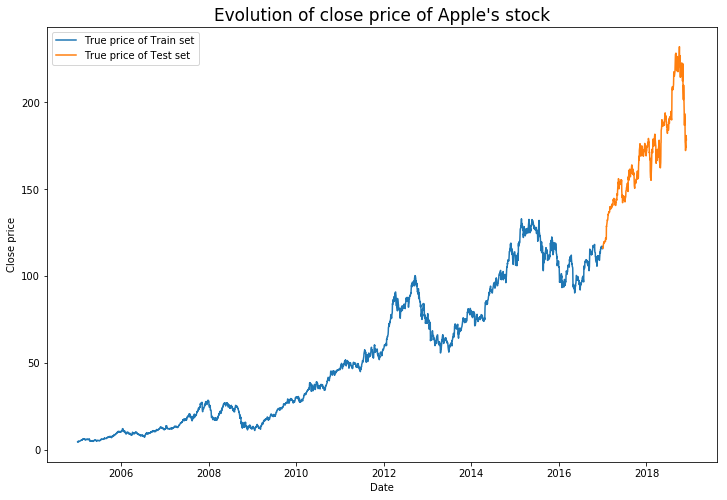

In [10]:
def plot_data(plot_train=True):
    plt.figure(figsize=(12, 8))
    if plot_train:
        plt.plot(train_data.Date, train_data.Close, label='True price of Train set', c='C0')
    plt.plot(test_data.Date, test_data.Close, label='True price of Test set', c='C1')
    plt.title("Evolution of close price of Apple's stock", fontsize=17)
    plt.ylabel("Close price")
    plt.xlabel("Date")

plot_data()
plt.legend()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

def get_x_y_from_df(df, scaler=None):
    df = df.drop('Date', axis=1)
    if scaler is None:
        scaler = StandardScaler().fit(df)
    df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
    return df[:-1], df.Close[1:], scaler

In [12]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3.021000e+03
mean,52.698237,53.208994,52.129651,52.679014,43.141929,1.438625e+08
std,38.596359,38.893638,38.276518,38.586391,37.069011,1.028602e+08
min,4.556428,4.636428,4.471428,4.520714,3.027354,1.147590e+07
25%,17.230000,17.498571,16.969999,17.214285,11.527766,6.956740e+07
50%,46.428570,46.542858,45.931427,46.382858,31.060879,1.181362e+08
75%,85.794289,86.699997,85.037140,86.142860,66.691956,1.898981e+08
max,134.460007,134.539993,131.399994,133.000000,124.616013,8.432424e+08


In [13]:
x_train, y_train, scaler = get_x_y_from_df(train_data)
x_test, y_test, _ = get_x_y_from_df(test_data, scaler)

### Prediction and evaluation 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linear_model = LinearRegression().fit(x_train, y_train)

In [16]:
y_predict = linear_model.predict(x_test)

Let's define a correct prediction as making at most a difference of 2% in our price predictions and see how our model performs on the test set.

75.52% of correct results with threshold=0.02.


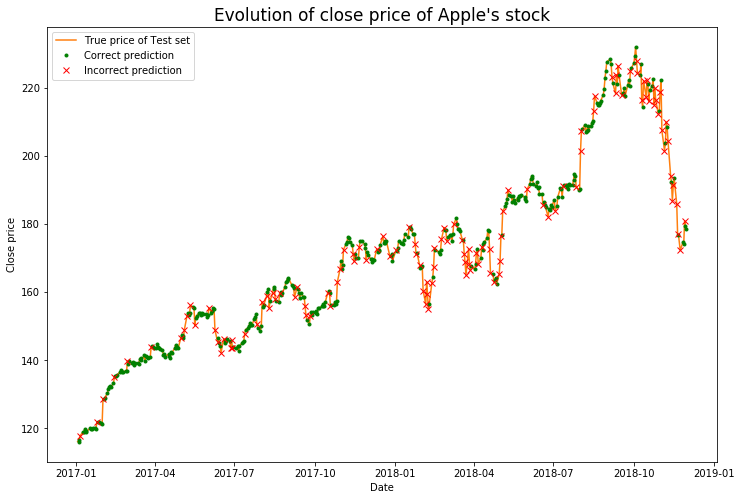

In [17]:
threshold = .02
is_correct = np.array(np.abs(y_predict - y_test)/y_test < threshold)
is_incorrect = np.invert(is_correct)

print("{:.2f}% of correct results with threshold={}.".format(is_correct.sum()/is_correct.shape[0]*100, threshold))

index_correct = test_data[np.append(is_correct, False)].index
index_incorrect = test_data[np.append(is_incorrect, False)].index

plot_data(plot_train=False)
plt.plot(test_data.loc[index_correct + 1].Date, test_data.Close.loc[index_correct + 1], 'g.', label='Correct prediction')
plt.plot(test_data.loc[index_incorrect + 1].Date, test_data.Close.loc[index_incorrect + 1], 'rx', label='Incorrect prediction')
plt.legend()
plt.show()

The model seems to be better at predicting the price when it doesn't change much over time. Let's see how the price predictions compare to the real data.

In [18]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume
9093,1.635186,1.623182,1.636531,1.645178,1.874626,-1.118990
9094,1.636481,1.627811,1.662400,1.641809,1.871225,-1.193510
9095,1.638295,1.636811,1.663968,1.657102,1.886660,-1.183052
9096,1.660581,1.670241,1.681214,1.690798,1.920670,-1.090112
9097,1.690899,1.702900,1.719625,1.718792,1.948924,-1.072512


In [19]:
scaler.scale_

array([3.85899705e+01, 3.88872000e+01, 3.82701826e+01, 3.85800039e+01,
       3.70628750e+01, 1.02843194e+08])

In [20]:
def unscale(y):
    return y * scaler.scale_[3] + scaler.mean_[3]

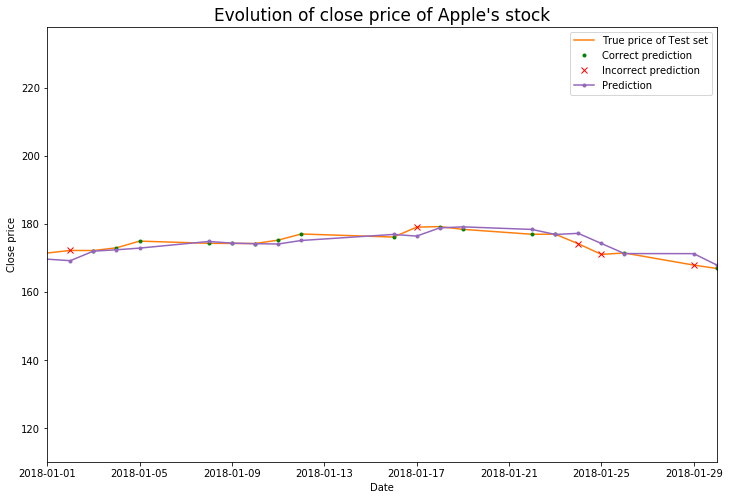

In [21]:
plot_data(plot_train=False)
plt.plot(test_data.loc[index_correct + 1].Date, test_data.Close.loc[index_correct + 1], 'g.', label='Correct prediction')
plt.plot(test_data.loc[index_incorrect + 1].Date, test_data.Close.loc[index_incorrect + 1], 'rx', label='Incorrect prediction')

plt.plot(test_data.Date[1:], unscale(y_predict), 'C4.-', label='Prediction')
plt.legend()
plt.xlim(create_timestamp(2018, 1, 1), create_timestamp(2018, 1, 30))
plt.show()

It seems that the prediction of the next day only corresponds to using the price of today. Let's see how the linear model compares to actually directly doing that.

In [22]:
y_predict_same_as_before = x_test.Close.values

In [23]:
is_correct = np.array(np.abs(y_predict_same_as_before - y_test)/y_test < threshold)
is_incorrect = np.invert(is_correct)

print("{:.2f}% of correct results with threshold={} with same-as-before model.".format(is_correct.sum()/is_correct.shape[0]*100, threshold))

76.56% of correct results with threshold=0.02 with same-as-before model.


In [24]:
is_correct = np.array(np.abs(y_predict - y_test)/y_test < threshold)
print("{:.2f}% of correct results with threshold={} on test set with linear model.".format(is_correct.sum()/is_correct.shape[0]*100, threshold))

75.52% of correct results with threshold=0.02 on test set with linear model.


Our regression doesn't bring much more than just predicting the next day's price as today's price. Let's try to force predictions to make a clear distinction between today and tomorrow by forcing the prediction to be an increase or a decrease in price for tomorrow taking into account what happened during the previous days.

# Movement Prediction

### Data cleaning

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
company_df = pd.read_csv('histories/apple.csv')

In [27]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [28]:
company_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [29]:
company_df['Date'] = pd.to_datetime(company_df['Date'])

In [30]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [31]:
company_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [32]:
def create_timestamp(year, month=1, day=1):
    return pd.Timestamp('{}-{:02d}-{:02d} 00:00:00'.format(year, month, day))

In [33]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [34]:
company_df["today_diff"] = company_df.Close - company_df.Open

In [35]:
company_df["today_mvt"] = company_df.today_diff.apply(lambda x: 1 if x >= 0 else 0)

In [36]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,today_diff,today_mvt
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0,0.000000,1
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0,-0.002232,0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0,-0.002232,0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0,0.000000,1
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0,0.000000,1


In [37]:
company_df[1:]["today_mvt"].values.shape

(9575,)

In [38]:
company_df["tomorrow_mvt"] = np.concatenate((company_df[1:]["today_mvt"], np.array([None])))

In [39]:
features_to_use = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
number_of_previous_days_to_add = 2

for i in range(1, number_of_previous_days_to_add + 1):
    for feature in features_to_use:
        company_df["{}{}".format(feature, -i)] = np.concatenate((np.array([None]*i), company_df[:-i][feature]))

In [40]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,today_diff,today_mvt,tomorrow_mvt,...,Low-1,Close-1,Adj Close-1,Volume-1,Open-2,High-2,Low-2,Close-2,Adj Close-2,Volume-2
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0,0.000000,1,0,...,None,None,None,None,None,None,None,None,None,None
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0,-0.002232,0,0,...,0.513393,0.513393,0.023106,1.17258e+08,None,None,None,None,None,None
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0,-0.002232,0,1,...,0.486607,0.486607,0.0219,4.39712e+07,0.513393,0.515625,0.513393,0.513393,0.023106,1.17258e+08
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0,0.000000,1,1,...,0.450893,0.450893,0.020293,2.6432e+07,0.488839,0.488839,0.486607,0.486607,0.0219,4.39712e+07
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0,0.000000,1,1,...,0.462054,0.462054,0.020795,2.16104e+07,0.453125,0.453125,0.450893,0.450893,0.020293,2.6432e+07


In [41]:
company_df.dropna(axis=0, inplace=True)

In [42]:
company_df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
today_diff             float64
today_mvt                int64
tomorrow_mvt            object
Open-1                  object
High-1                  object
Low-1                   object
Close-1                 object
Adj Close-1             object
Volume-1                object
Open-2                  object
High-2                  object
Low-2                   object
Close-2                 object
Adj Close-2             object
Volume-2                object
dtype: object

In [43]:
company_df['tomorrow_mvt'] = company_df['tomorrow_mvt'].astype(int)

In [44]:
for c in company_df.columns:
    if company_df.dtypes[c] == object:
        company_df[c] = company_df[c].astype(float)

In [45]:
company_df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
today_diff             float64
today_mvt                int64
tomorrow_mvt             int32
Open-1                 float64
High-1                 float64
Low-1                  float64
Close-1                float64
Adj Close-1            float64
Volume-1               float64
Open-2                 float64
High-2                 float64
Low-2                  float64
Close-2                float64
Adj Close-2            float64
Volume-2               float64
dtype: object

In [46]:
train_data = company_df[(company_df.Date >= create_timestamp(2005)) & (company_df.Date < create_timestamp(2017))]
test_data = company_df[company_df.Date >= create_timestamp(2017)]

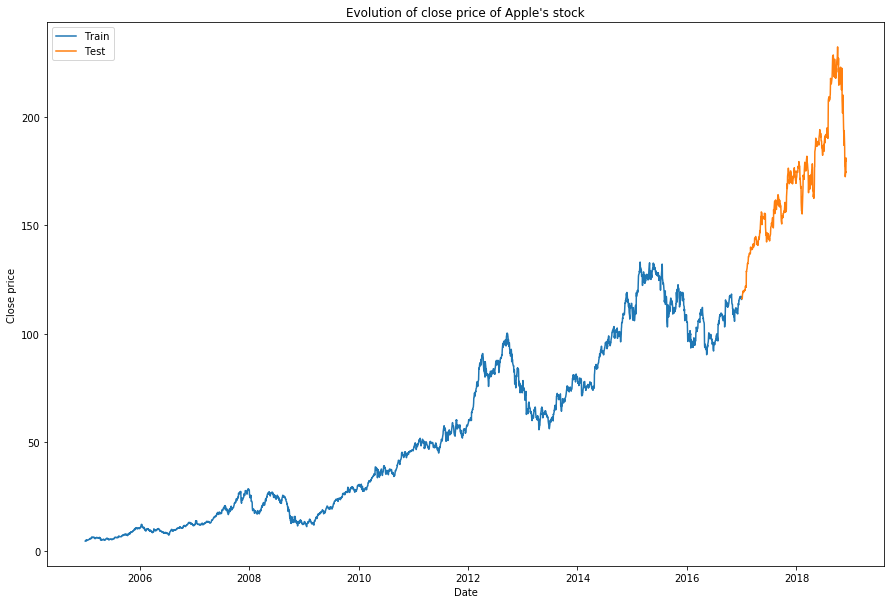

In [47]:
def plot_data(plot_train=True):
    plt.figure(figsize=(15, 10))
    if plot_train:
        plt.plot(train_data.Date, train_data.Close, label='Train', c='C0')
    plt.plot(test_data.Date, test_data.Close, label='Test', c='C1')
    plt.title("Evolution of close price of Apple's stock")
    plt.ylabel("Close price")
    plt.xlabel("Date")

plot_data()
plt.legend()
plt.show()

In [48]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,today_diff,today_mvt,tomorrow_mvt,...,Low-1,Close-1,Adj Close-1,Volume-1,Open-2,High-2,Low-2,Close-2,Adj Close-2,Volume-2
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0,-0.002232,0,1,...,0.486607,0.486607,0.021900,43971200.0,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0,0.000000,1,1,...,0.450893,0.450893,0.020293,26432000.0,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0,0.000000,1,1,...,0.462054,0.462054,0.020795,21610400.0,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.022704,12157600.0,0.000000,1,1,...,0.475446,0.475446,0.021398,18362400.0,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.023809,9340800.0,0.000000,1,1,...,0.504464,0.504464,0.022704,12157600.0,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [49]:
def get_x_y_from_df(df):
    df = df.drop(['Date', 'today_diff', 'today_mvt'], axis=1)
    return df.drop('tomorrow_mvt', axis=1), df['tomorrow_mvt']

In [50]:
x_train, y_train = get_x_y_from_df(train_data)
x_test, y_test = get_x_y_from_df(test_data)

### Predictions and evaluation

In [51]:
y_train.value_counts() / y_train.shape[0]

1    0.505131
0    0.494869
Name: tomorrow_mvt, dtype: float64

In [52]:
y_test.value_counts() / y_test.shape[0]

1    0.524896
0    0.475104
Name: tomorrow_mvt, dtype: float64

In [53]:
def fit_and_score(model):
    model.fit(x_train, y_train)
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(x_test, y_test)
    print("Accuracy on train set is {}".format(accuracy_train))
    print("Accuracy on test set is {}".format(accuracy_test))
    return accuracy_train, accuracy_test

In [54]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegressionCV

In [55]:
fit_and_score(LGBMClassifier(n_estimators=150))

Accuracy on train set is 0.9275074478649454
Accuracy on test set is 0.47925311203319504


(0.9275074478649454, 0.47925311203319504)

In [56]:
fit_and_score(LogisticRegressionCV(cv=5))

Accuracy on train set is 0.5097649784839458
Accuracy on test set is 0.491701244813278


(0.5097649784839458, 0.491701244813278)

In [57]:
from xgboost import XGBClassifier
fit_and_score(XGBClassifier(n_estimators=150))

Accuracy on train set is 0.735187024164184
Accuracy on test set is 0.47717842323651455


(0.735187024164184, 0.47717842323651455)

For the prediction on the train set, we remain close to 50% accuracy which shows that the market is quite random and thus really hard to predict.